In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

# Data treatment
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.model_selection import train_test_split
import pickle

# Base classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# Multilabel classifiers - Problem Transformation
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.ensemble import RakelD

# Multilabel classifiers - Algorithm Adaptation
from skmultilearn.adapt import BRkNNaClassifier
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import MLTSVM

# Metrics
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Embedding classifiers
#from skmultilearn.embedding import OpenNetworkEmbedder, CLEMS, SKLearnEmbedder
#from sklearn.manifold import SpectralEmbedding
#from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
#from skmultilearn.embedding import EmbeddingClassifier
#from sklearn.ensemble import RandomForestRegressor

from utils import KunischMetrics
from utils import KunischPruner
from utils import DataExplorer
from utils import KunischPlotter

import os

In [4]:
output_dir = os.path.join('..', 'outputs', 'resnet_E3', 'resnet18_evo', 'blur_rain_ref_rot_crop1_elastic1', '5-281L')

scores = pd.read_csv(os.path.join(output_dir, 'resultados.csv'))
scores.index = pd.MultiIndex.from_arrays(scores[['Unnamed: 0', 'labels']].values.T, names=['Metodo', 'Labels'])
scores = scores.drop(['Unnamed: 0', 'labels'], axis=1)

#scores = scores.drop(['BR_GNB', 'LP_GNB', 'RakelD_GNB', 'CC_GNB'])

In [ ]:
 scores.loc['BR_LR']['accuracy'].values

In [8]:
dic = {}

nlabels = [5, 14, 26, 34, 54, 63, 72, 82, 91, 107, 131, 169, 281]

experimentos = []

for score_name in scores.columns:
    dic[score_name] = {}
    
for metodo in scores.index:
    if metodo[0] not in experimentos:
        experimentos.append(metodo[0])
        
for metodo in experimentos:
    for score_name in scores.columns:
        dic[score_name][metodo] = list(scores.loc[metodo][score_name].values)

dic

{'accuracy': {'BR_LR': [0.4639,
   0.1894,
   0.0554,
   0.0451,
   0.0296,
   0.0283,
   0.027,
   0.0258,
   0.0245,
   0.0155,
   0.0155,
   0.0155,
   0.0155],
  'CC_LR': [0.5129,
   0.2397,
   0.1018,
   0.0709,
   0.0593,
   0.0593,
   0.0606,
   0.0606,
   0.0567,
   0.0438,
   0.0386,
   0.0309,
   0.0361],
  'RakelD_LR': [0.4575,
   0.1379,
   0.0348,
   0.0284,
   0.0155,
   0.0129,
   0.0181,
   0.009,
   0.0116,
   0.0129,
   0.0103,
   0.0155,
   0.0142]},
 'hamming_score': {'BR_LR': [0.245,
   0.1525,
   0.1222,
   0.0067,
   0.0066,
   0.0064,
   0.0059,
   0.0056,
   0.0056,
   0.0041,
   0.004,
   0.0027,
   0.0027],
  'CC_LR': [0.2527,
   0.1552,
   0.1222,
   0.0067,
   0.0079,
   0.0064,
   0.0059,
   0.0056,
   0.0056,
   0.0041,
   0.004,
   0.0027,
   0.0027],
  'RakelD_LR': [0.2512,
   0.1488,
   0.1218,
   0.0067,
   0.0066,
   0.0064,
   0.0059,
   0.0056,
   0.0056,
   0.0056,
   0.0056,
   0.0052,
   0.005]},
 'hamming_loss': {'BR_LR': [0.1647,
   0.1382,
  

In [10]:
target = '5mr'
target_name = '5-MR Score'
t_scores = dic[target]
t_scores

{'BR_LR': [0.7784,
  0.6147,
  0.5,
  0.4703,
  0.4485,
  0.4382,
  0.424,
  0.4136,
  0.4059,
  0.3815,
  0.3686,
  0.366,
  0.3454],
 'CC_LR': [0.7964,
  0.6224,
  0.4897,
  0.4253,
  0.3763,
  0.3673,
  0.3505,
  0.3402,
  0.3299,
  0.3247,
  0.3145,
  0.2938,
  0.3041],
 'RakelD_LR': [0.7655,
  0.5541,
  0.4729,
  0.4291,
  0.4072,
  0.3918,
  0.4072,
  0.4047,
  0.3673,
  0.3724,
  0.3815,
  0.3544,
  0.3492]}

In [11]:
AUCS = {}
for curva, valores in t_scores.items():
    auc = 0
    for i in range(len(valores)-1):
        score_init = valores[i]
        score_final = valores[i+1]
        low_score = min(score_init, score_final)
        high_score = max(score_init, score_final)
        rectangulo = low_score * (nlabels[i+1] - nlabels[i]) 
        triangulo = high_score * (nlabels[i+1] - nlabels[i])/2
        auc += rectangulo + triangulo
    AUCS[curva] = auc
AUCS

{'BR_LR': 164.54675,
 'CC_LR': 141.75119999999998,
 'RakelD_LR': 159.16160000000002}

In [12]:
np.average(t_scores['BRkNN'])

KeyError: 'BRkNN'

In [13]:
plt.rcParams.update({'font.size': 6})
plt.rcParams['figure.dpi'] = 300
plotter = KunischPlotter()

IndexError: list index out of range

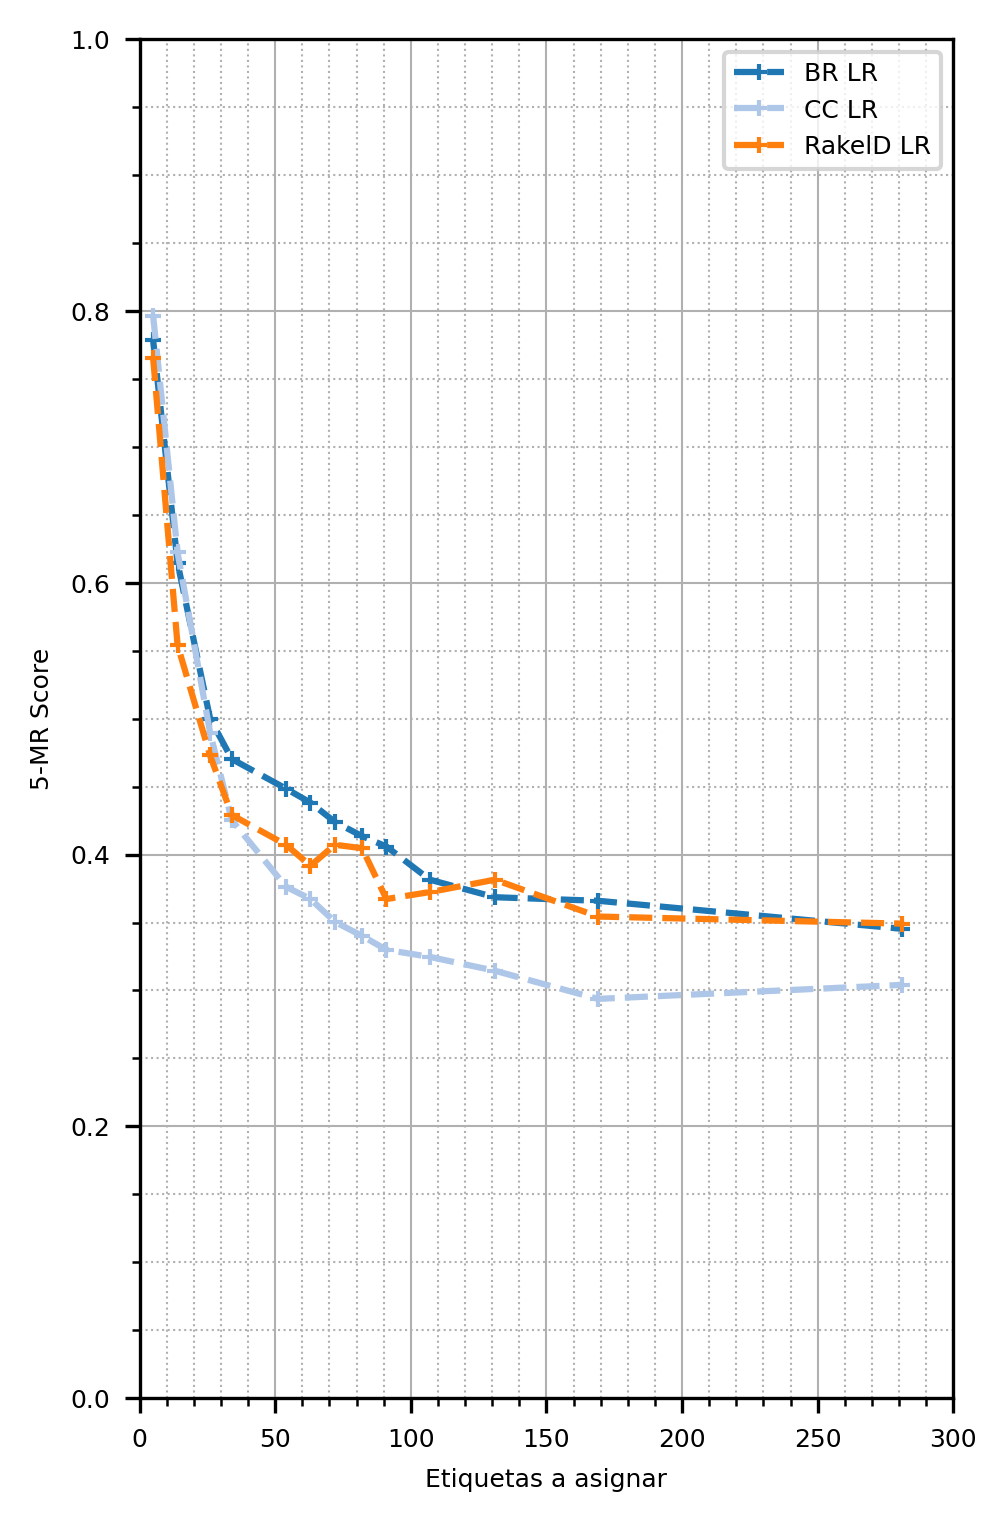

In [15]:
labels = list(t_scores.keys())
labels_pp = []
for label in labels:
    labels_pp.append(label.replace('_', ' '))
plotter.plot_results(nlabels,
             score = list(t_scores.values()),
             label = labels_pp,
             #title = target_name + ' v/s Cantidad de Etiquetas\nSin pesos balanceados',
             xlabel = "Etiquetas a asignar", ylabel = target_name,
             ylim = 1.0,
             xlim = 300,
             width = 3.5,
             height = 6,
             grid = True,
             minorgrid = True, 
             order = [9, 0, 6, 3, 12, 2, 11, 13, 8, 5, 4, 1, 7, 10, 14])

#              order = [0, 8, 12, 4, 1, 9, 13, 3, 7, 16, 17, 2, 14, 10, 5, 6, 15, 11, 18])